In [1]:
import io
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd
import pickle
import PIL
import torch
import torchvision
import urllib
import warnings
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import eot_attack_evaluator
from attacks import eot_attacks
from attacks import utils
from utils import labels_util

# Disable annoying UserWarning caused by using nn.Upsample
# in the relighting model.
warnings.filterwarnings("ignore", category=UserWarning) 

%load_ext autoreload
%autoreload 2

# I. VGGFace2 + a VGGFace2 Classifier + [multiilum | DPR] evaluation

## I.a. Pretrained classifier

In [2]:
configs = [
#{
#    'dataset': 'vggface2',
#    'dataset_mode': 'test',
#    'classif_model_name': 'vggface2_pretrained',
#    'classif_mode': 'normal_pretrained',
#    'relight_model_name': 'multi_illumination_murmann',
#    
#    'relight_checkpoint_path': '../relighters/multi_illumination/'\
#                               'checkpoints/relight/epoch_13.pth',
#    'relighter_eps': 1e-4,
#    'learning_rate': 0.02, 
#    'num_iterations': 5, 
#    'gamma': 1.4, 
#    'epses': [0.1],
##    'attack_type': 'class_constrained_eot',
#    'targets': [1, 3],     # eg: [0, 8] Target: 'Aaron Eeckhart' for everyone besides himself, otherwise 'Quincy Jones'
#    'debugging': False,
#},
{
    'dataset': 'vggface2',
    'dataset_mode': 'test',
    'classif_model_name': 'vggface2_pretrained',
   'classif_mode': 'normal_pretrained',
    'relight_model_name': 'dpr',
    'relight_checkpoint_path': '../relighters/DPR/trained_model/trained_model_03.t7',
#    'relight_model_name': 'multi_illumination_murmann',
#    'relight_checkpoint_path': '../relighters/multi_illumination/'\
#                               'checkpoints/relight/epoch_13.pth', 
#    'relighter_eps': 1e-4,
#    'gamma': 1.4, 
    'learning_rate': 0.02,
    'num_iterations': 100,
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],
    'debugging': False,
},
#{
#    'dataset': 'vggface2',
#    'dataset_mode': 'test',
#    'classif_model_name': 'vggface2_pretrained',
#    'classif_mode': 'adversarial_train',
#    'relight_model_name': 'dpr',
#    
#    'relight_checkpoint_path': '../relighters/DPR/trained_model/trained_model_03.t7',
#    'learning_rate': 0.02,
#    'num_iterations': 5,
#    'epses': [0.01],
#    'attack_type': 'class_constrained_eot',
#    'targets': [1, 3],
#    'debugging': False,
#
#},
]

Loading pretrained model!
Loaded pretrained classifier: vggface2_pretrained.
Loaded the relighter: dpr.
--------------------------------------------------------------------
eps:  0.1


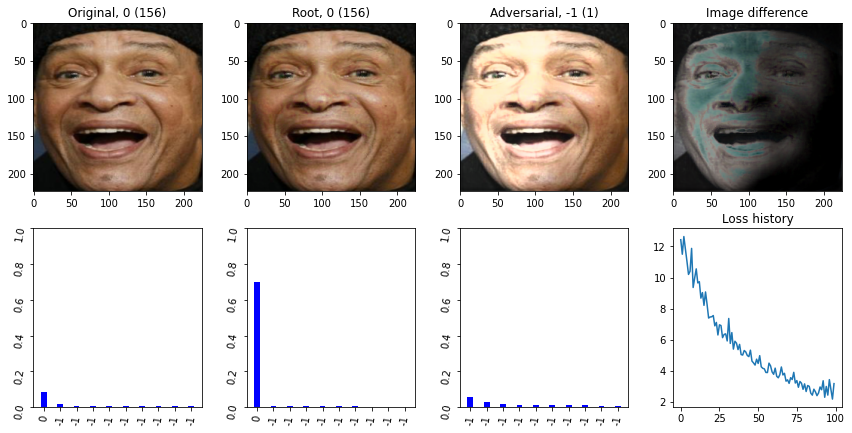

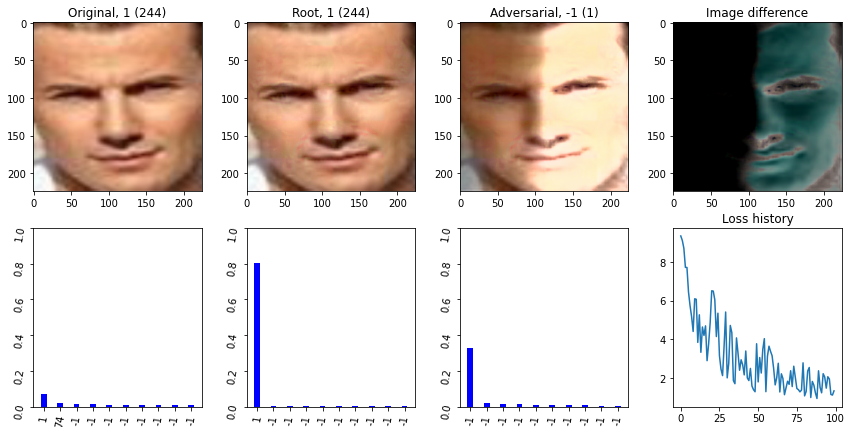

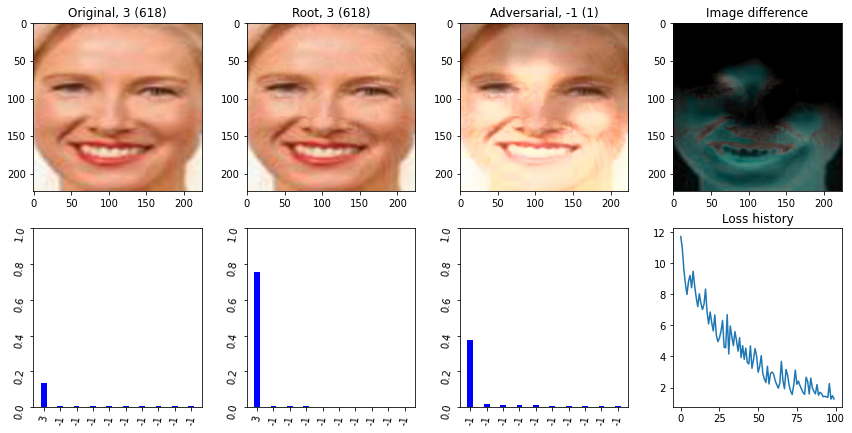

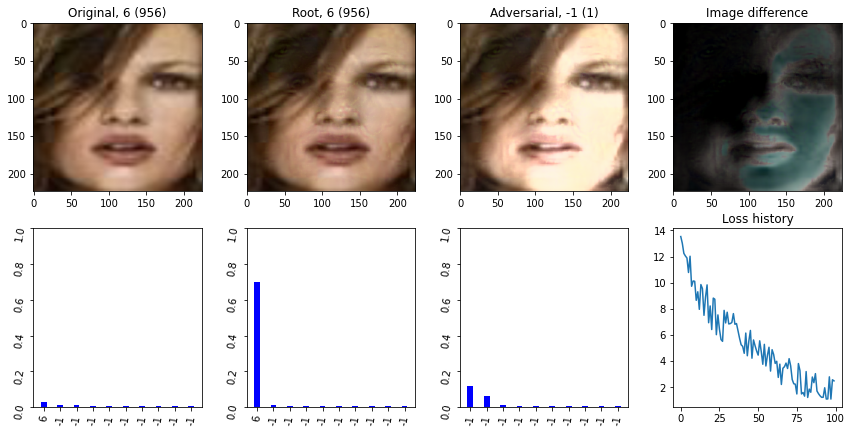

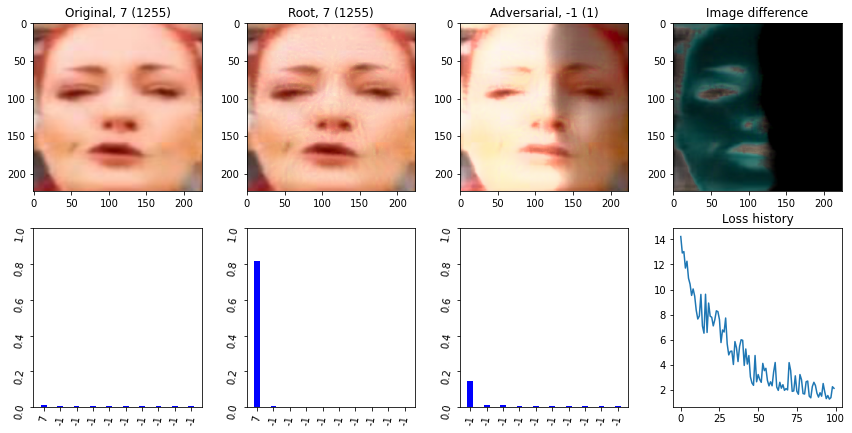

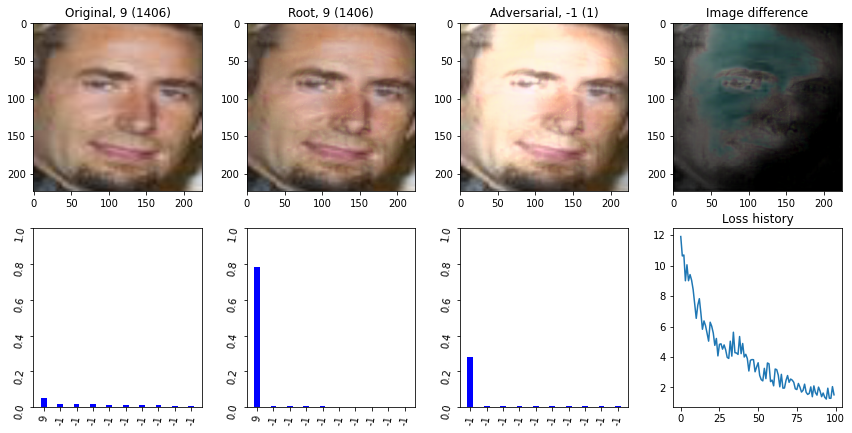

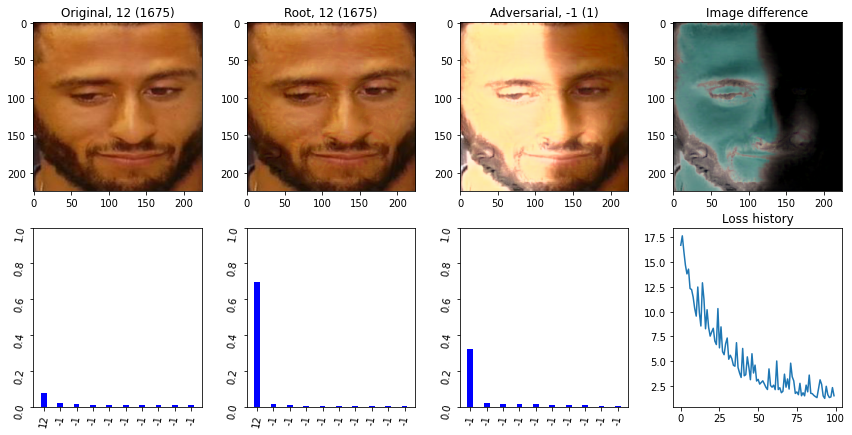

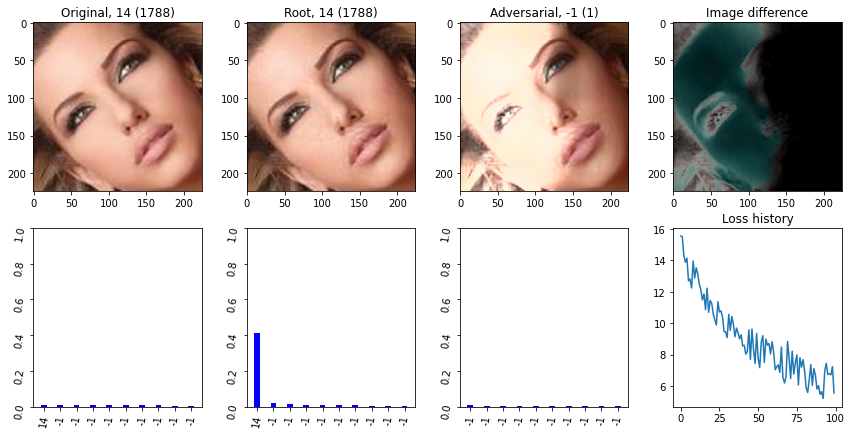

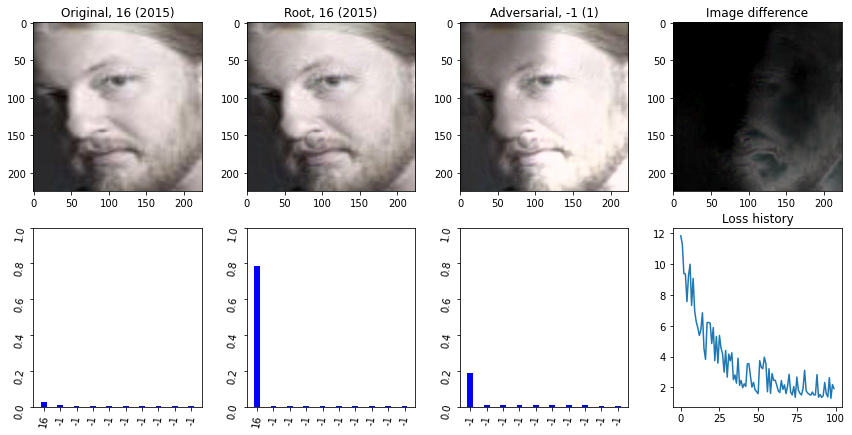

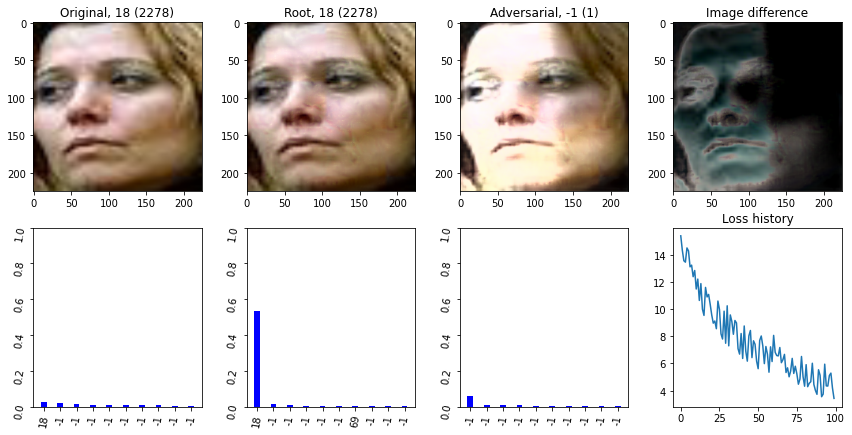

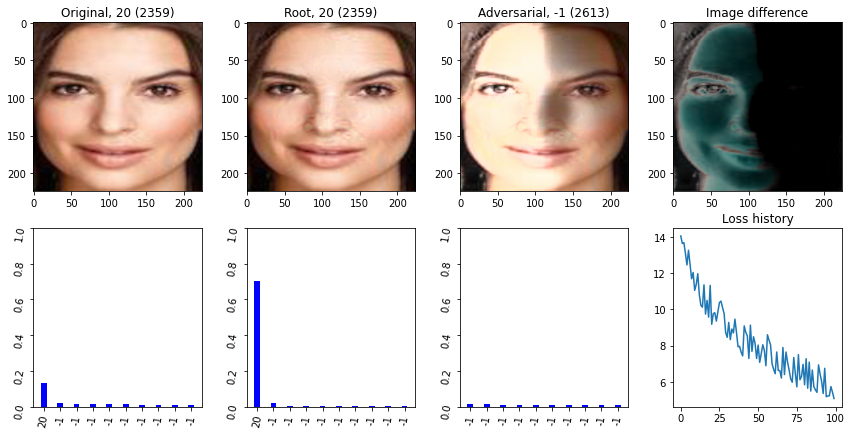

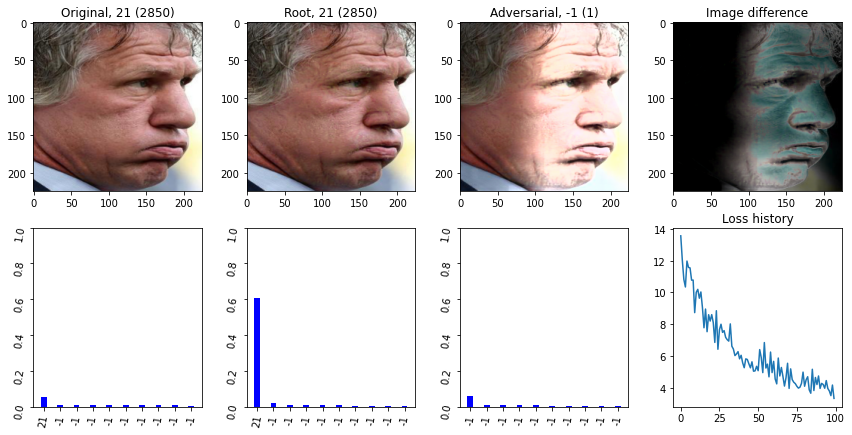

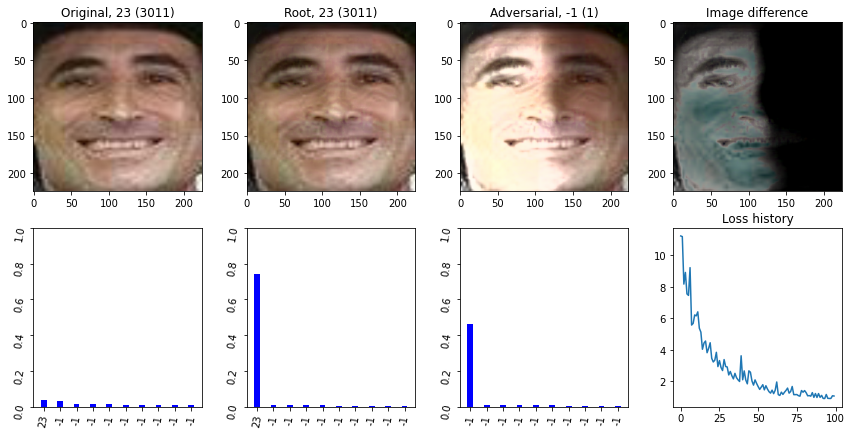

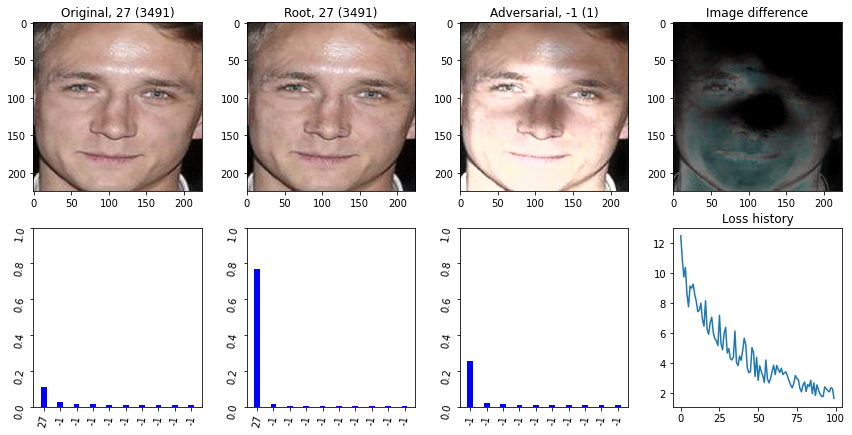

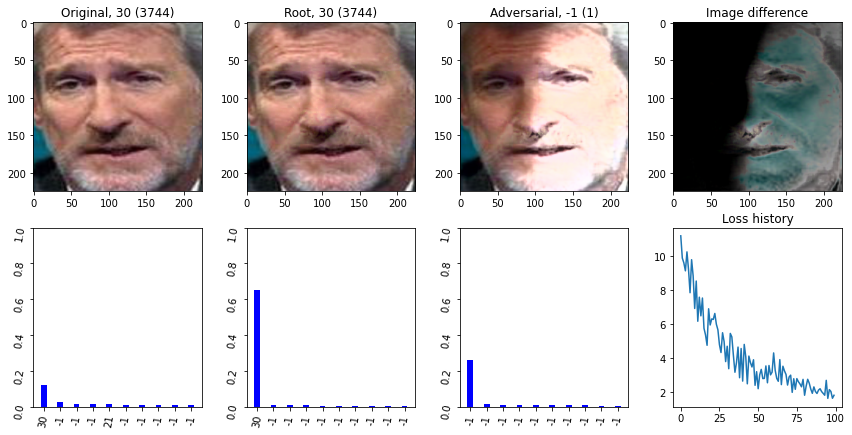

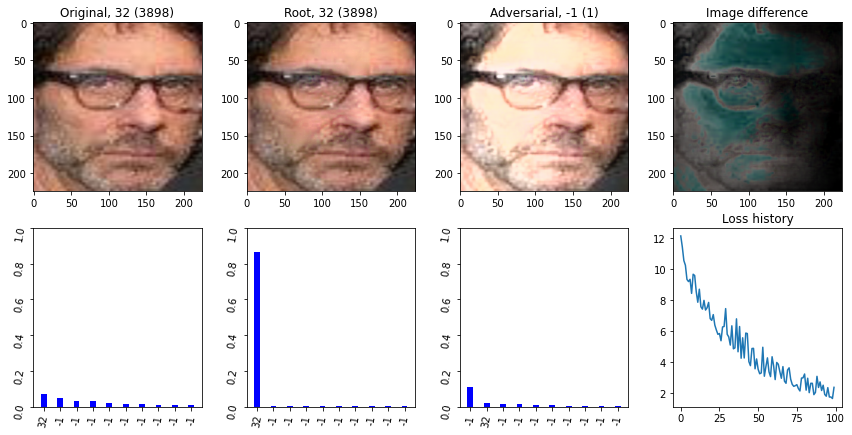

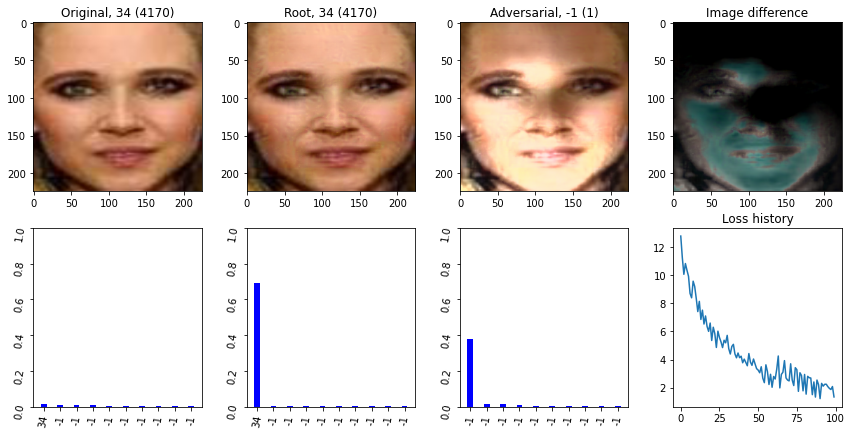

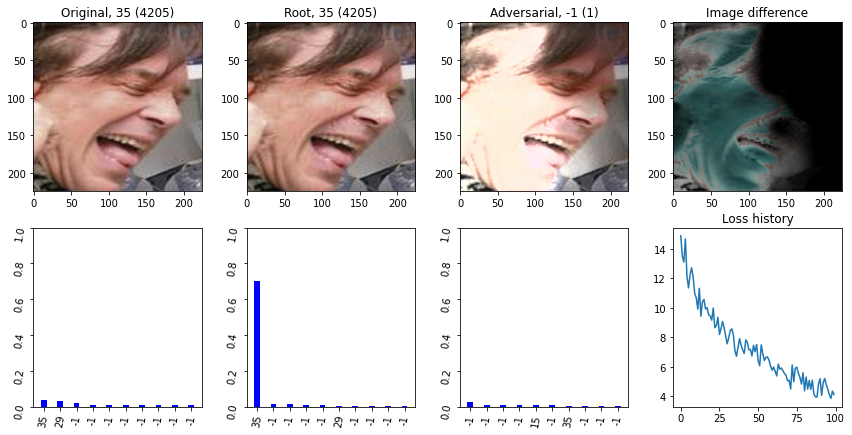

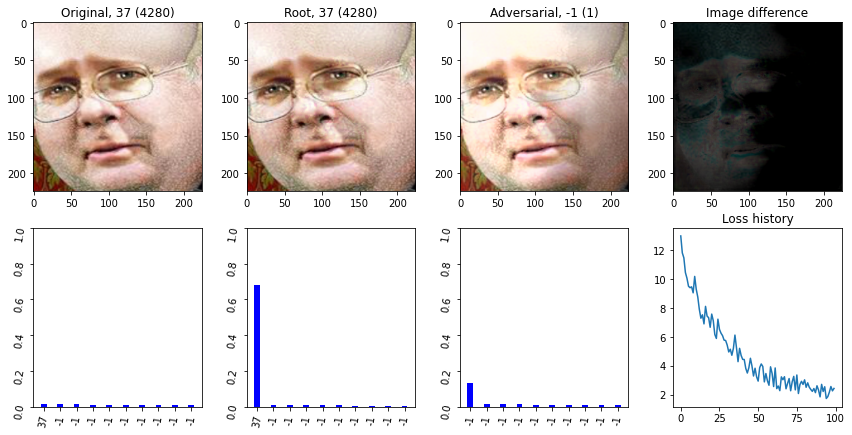

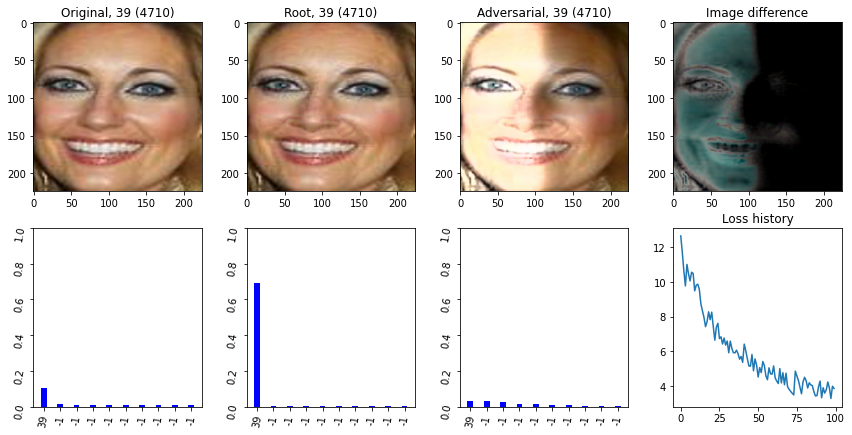

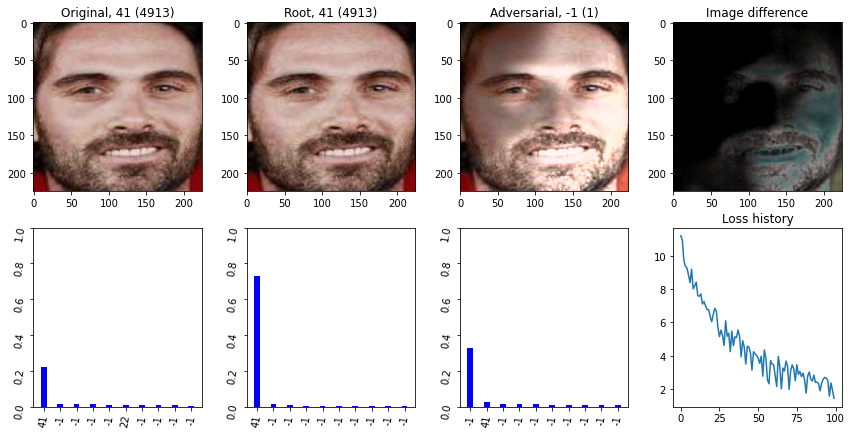

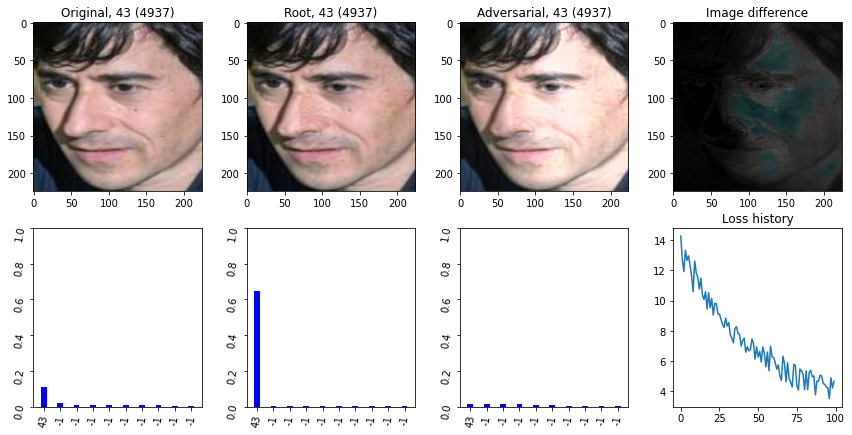

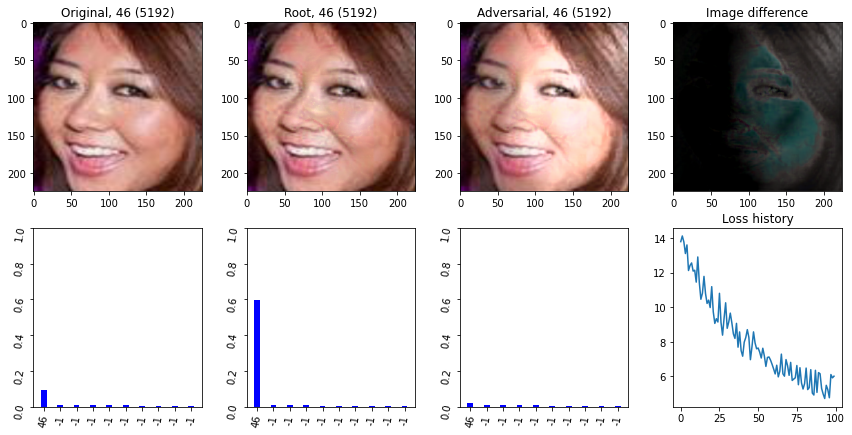

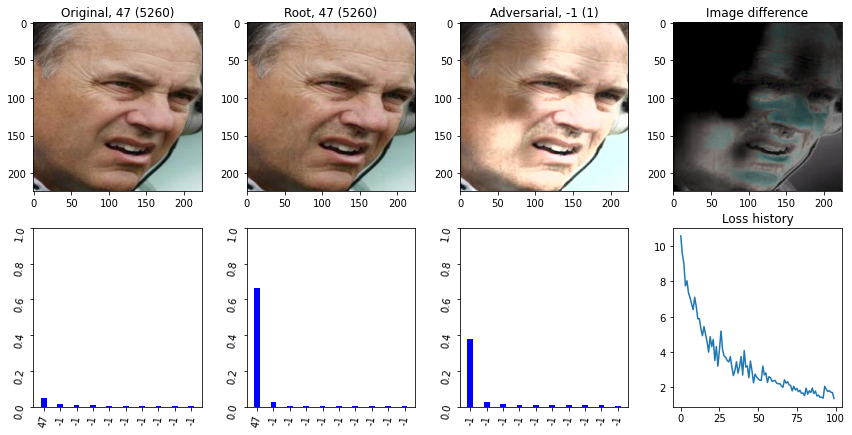

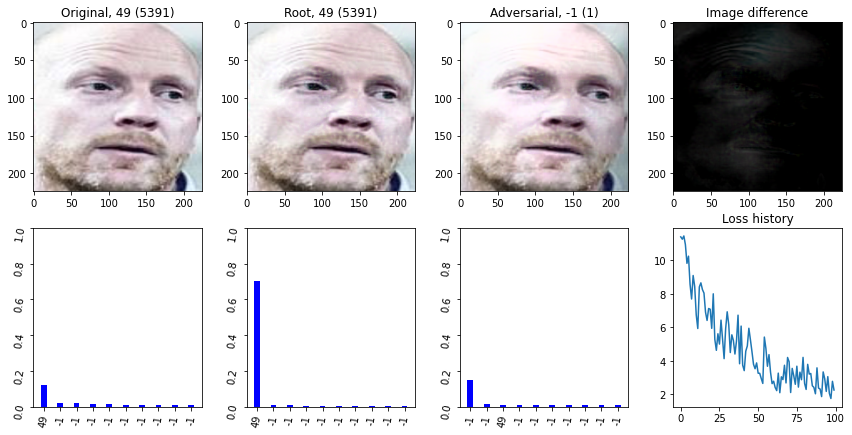

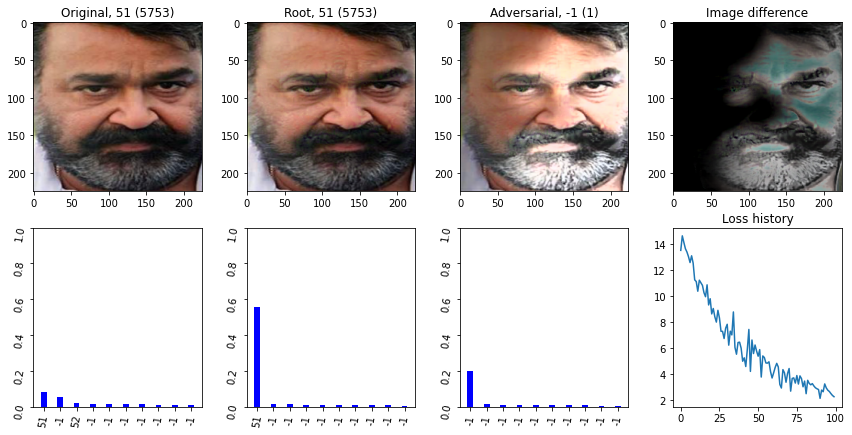

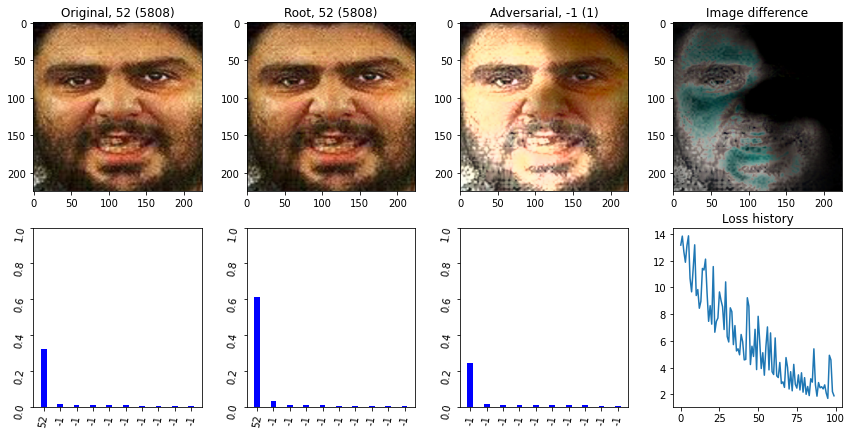

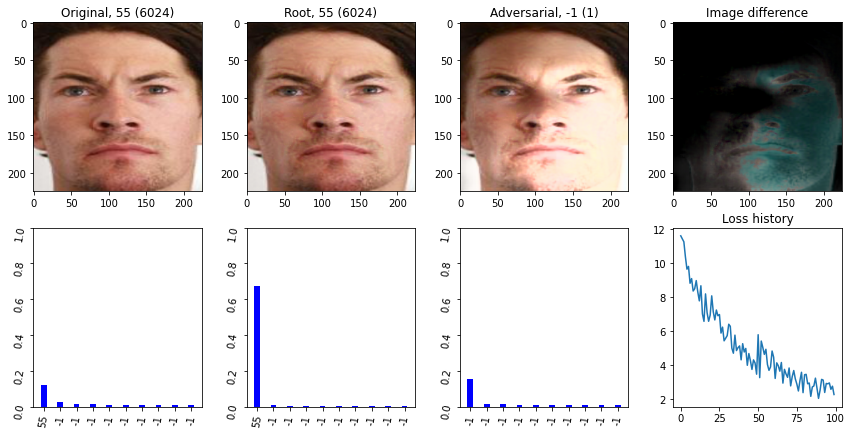

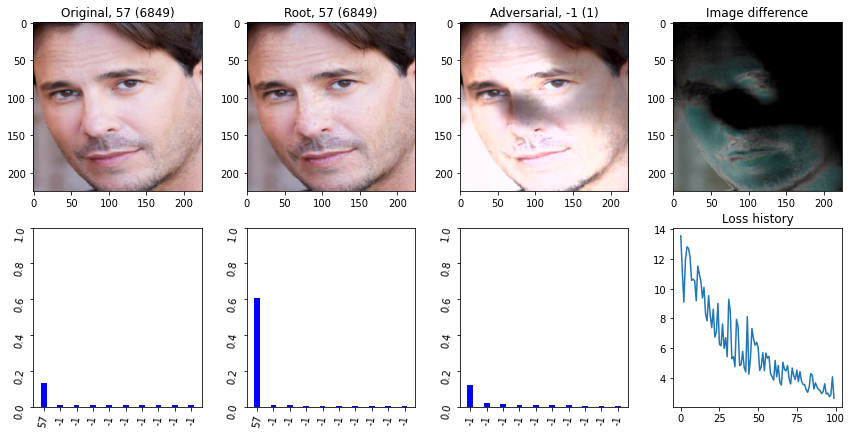

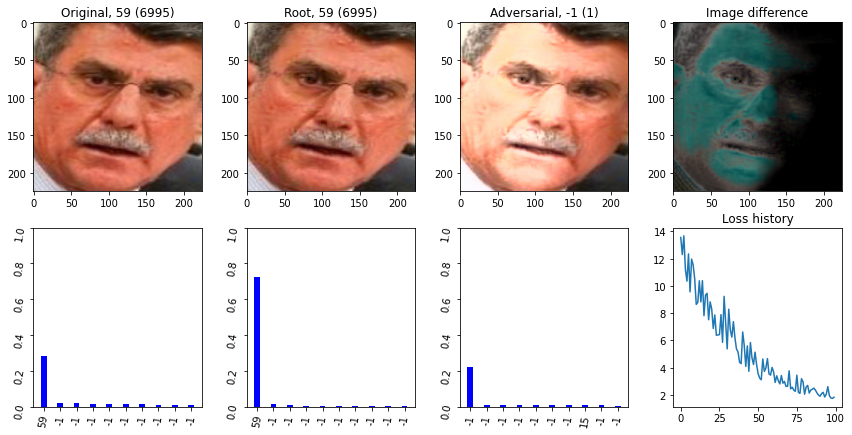

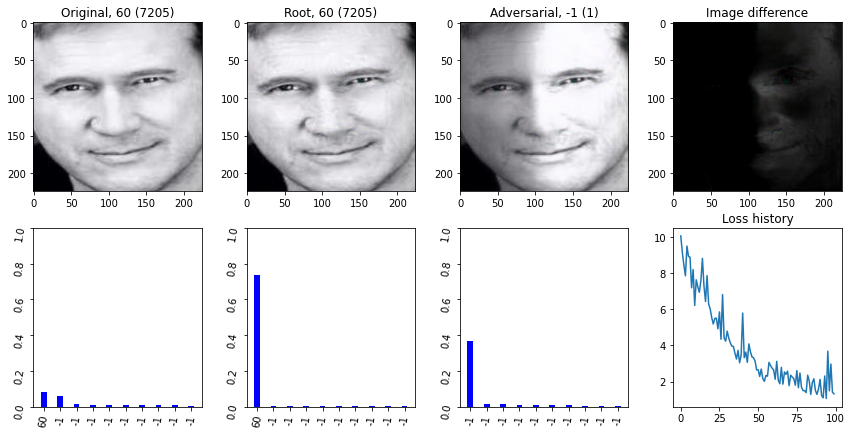

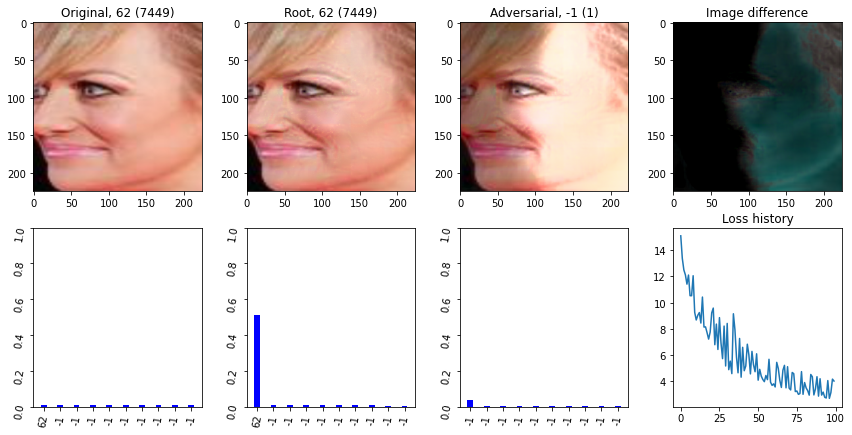

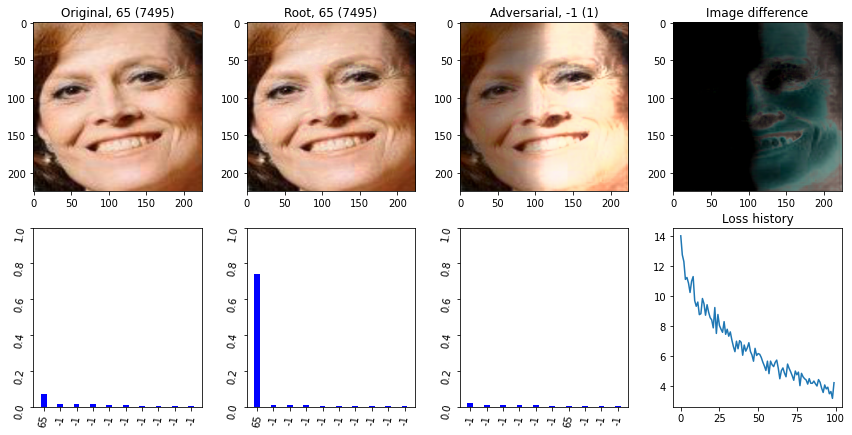

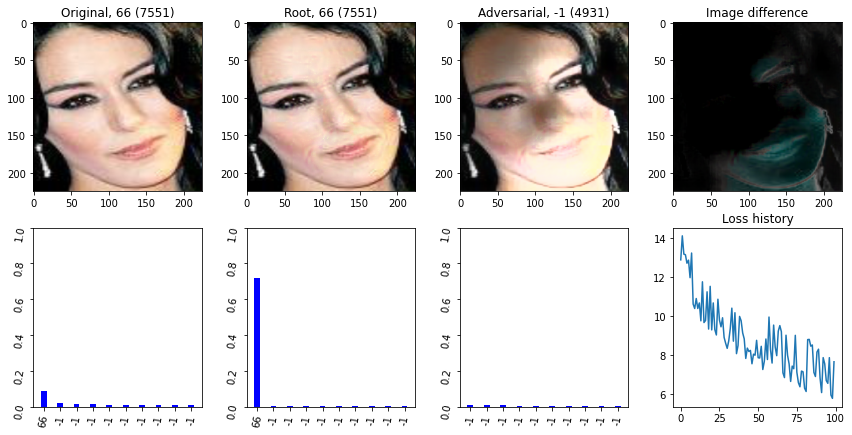

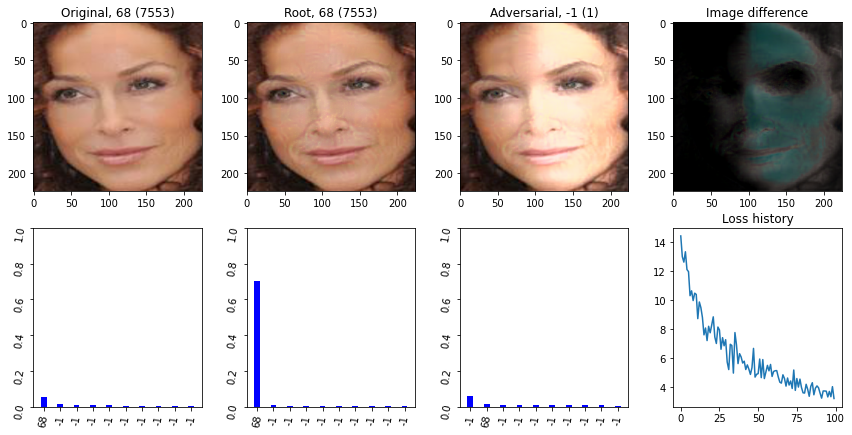

KeyboardInterrupt: 

In [3]:
for config in configs:
    ev = eot_attack_evaluator.AttackEvaluator(config, '_results_last.csv')
    ev.evaluate()

